In [2]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib as plt 
import seaborn as sns
import time
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
#import gensim

In [ ]:
url="https://thinkil.co.il/texts-sitemap.xml"
res=requests.get(url, verify=False)
soup = BeautifulSoup(res.content, ['lxml', 'xml'])
soup_list = soup.findChildren('loc')
urls_list = []
for element in soup_list:
    net = element.get_text()
    if net.endswith(('jpg','png')) == False: #TODO: It's probably not the most elegant way to do it, but I had a hard time using the  BeautifulSoup package
        urls_list.append(net)
#remove the first link
dat = pd.DataFrame(columns=['url','title','auther','text'])
dat.url = urls_list[1:282]
dat

In [ ]:
for i in range(len(dat)):
    time.sleep(1)
    res = requests.get(dat.loc[i,'url'])# verify=False)
    res.content
    soup = BeautifulSoup(res.content, 'html.parser')
#     title = soup.title.string.split(' - ')[0]
    title_author = soup.findChildren('hgroup')[0].get_text().split('מאת:')
    title = title_author[0]
    author = title_author[1]
    text = soup.findChildren('article')[0].get_text()
    dat.loc[i,1:] = [title,author,text]
dat

In [ ]:
dat.to_csv('C:/Users/User/Dropbox/NLP/shared_NLP/articles_data.tsv', sep='\t')

In [9]:
dat = pd.read_csv('C:/Users/User/Dropbox/NLP/shared_NLP/articles_data.tsv', sep='\t', index_col='Unnamed: 0')
dat

,url,title,auther,text
0,https://thinkil.co.il/texts/m064p010-019/,הפסיכולוגיה של האי ודאות,עמוס טברסקי מיה בר-הלל,\n\n\n הקדמה:\n ...
1,https://thinkil.co.il/texts/m064p020-027/,הפרדוקסליות של הוודאות,יהושע אריאלי,\n\n\n הקדמה:\n ...
2,https://thinkil.co.il/texts/m064p028-039/,המשמעות שמעבר לצלילים,אסתר שינברג,\n\n\n הקדמה:\n ...
3,https://thinkil.co.il/texts/m064p040-047/,מישהו יודע משהו שמישהו אחר …,אריאל רובינשטיין,\n\n\n הקדמה:\n ...
4,https://thinkil.co.il/texts/m064p048-055/,דטרמיניזם וחופש הרצון,אבישי מרגלית,\n\n\n הקדמה:\n ...
...,...,...,...,...
277,https://thinkil.co.il/texts/m016p008-009/,האיש שלנו באוניברסיטה,,\n\n\nבאוגוסט 1965 נערכה באוניברסיטה העברית מס...
278,https://thinkil.co.il/texts/m016p010-012/,שתי ערים,,\n\nמבחינה גיאוגרפית מפריד מרחק של כ-20 ק״מ בל...
279,https://thinkil.co.il/texts/m016p014-015/,שרות ואחזקה בדור המחשבים השלישי,,\n\nהופעת המערכת י.ב.מ./360 כנציגתה המובהקת של...
280,https://thinkil.co.il/texts/m016p016-016/,ידיעות מעולם המחשבים,,\n\nקורס תיכנות בבית סהר\nאסיר בן 34 השפוט על ...


In [25]:
def to_words(text):
    return text.split()

def words_num_hist(texts):
    words_num = [len(to_words(text)) for text in texts]
    plt.bar(range(len(words_num)), words_num, color='b')
#     plt.xticks(indices, word, rotation='vertical')
    plt.tight_layout()
    plt.show()

def words_hist(words):
    cv = CountVectorizer(words)
    cv.vocabulary_

In [26]:
# words_hist(to_words(dat.loc[0,'text']))
cv = CountVectorizer(to_words(dat.loc[0,'text']))
cv.vocabulary_

AttributeError: 'CountVectorizer' object has no attribute 'vocabulary_'

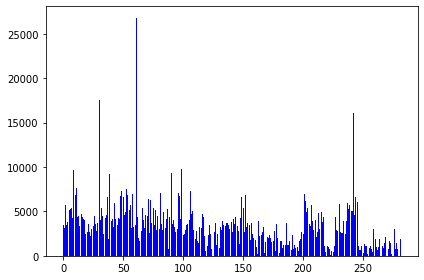

In [13]:
words_num_hist(dat.text)

In [4]:
dat['num_word'] = 'NA'
words = []
for i in range(len(dat)):
    words.append(dat.text[i].split())
    dat.num_word[i] = len(words[i])
dat

,url,title,auther,text,num_word
0,https://thinkil.co.il/texts/m064p010-019/,הפסיכולוגיה של האי ודאות,עמוס טברסקי מיה בר-הלל,\n\n\n הקדמה:\n ...,3466
1,https://thinkil.co.il/texts/m064p020-027/,הפרדוקסליות של הוודאות,יהושע אריאלי,\n\n\n הקדמה:\n ...,3153
2,https://thinkil.co.il/texts/m064p028-039/,המשמעות שמעבר לצלילים,אסתר שינברג,\n\n\n הקדמה:\n ...,5741
3,https://thinkil.co.il/texts/m064p040-047/,מישהו יודע משהו שמישהו אחר …,אריאל רובינשטיין,\n\n\n הקדמה:\n ...,3525
4,https://thinkil.co.il/texts/m064p048-055/,דטרמיניזם וחופש הרצון,אבישי מרגלית,\n\n\n הקדמה:\n ...,3762
...,...,...,...,...,...
277,https://thinkil.co.il/texts/m016p008-009/,האיש שלנו באוניברסיטה,,\n\n\nבאוגוסט 1965 נערכה באוניברסיטה העברית מס...,795
278,https://thinkil.co.il/texts/m016p010-012/,שתי ערים,,\n\nמבחינה גיאוגרפית מפריד מרחק של כ-20 ק״מ בל...,1463
279,https://thinkil.co.il/texts/m016p014-015/,שרות ואחזקה בדור המחשבים השלישי,,\n\nהופעת המערכת י.ב.מ./360 כנציגתה המובהקת של...,821
280,https://thinkil.co.il/texts/m016p016-016/,ידיעות מעולם המחשבים,,\n\nקורס תיכנות בבית סהר\nאסיר בן 34 השפוט על ...,445


In [5]:
common_20 = Counter(" ".join(dat["text"]).split()).most_common(20)
word = []
frequency = []

for i in range(len(common_20)):
    word.append(common_20[i][0][::-1]) #TODO: look out! I turned the direction of the word, for it to come out right in the plot. If it needs to be returned, it must be reversed again!
    frequency.append(common_20[i][1])



In [6]:
common_20

[('של', 30348),
 ('את', 17956),
 ('על', 11288),
 ('הוא', 7130),
 ('לא', 7076),
 ('זה', 4807),
 ('—', 4632),
 ('כל', 4581),
 ('היא', 4426),
 ('או', 4420),
 ('אם', 4001),
 ('גם', 3791),
 ('כי', 3406),
 ('בין', 3206),
 ('עם', 3011),
 ('אין', 2663),
 ('מה', 2589),
 ('אלא', 2468),
 ('אך', 2467),
 ('היה', 2402)]

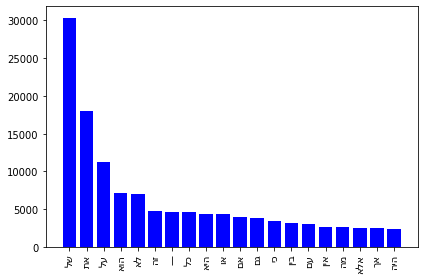

In [7]:
import numpy as np
import matplotlib.pyplot as plt

indices = np.arange(len(common_20))
plt.bar(indices, frequency, color='b')
plt.xticks(indices, word, rotation='vertical')
plt.tight_layout()
plt.show()

NameError: name 'ngrams' is not defined